# imports

In [2]:
import pandas as pd
import csv
import heartbeat as hb
import neurokit2 as nk
import matplotlib.pyplot as plt
from edfrd import read_header, read_data_records
from datetime import time
from datetime import datetime
from datetime import date
from datetime import timedelta

In [3]:
import edfrd
from neurokit2.hrv.hrv_utils import _hrv_get_rri

In [3]:
# bigger images

In [4]:
#plt.rcParams['figure.figsize'] = [15, 9]  

# Hypnogram Epochen ermitteln

In [5]:
with open('schlafprofil.txt', 'r') as file:
    reader = csv.reader(file)
    #for row in reader:
        #print(row)

In [6]:
# import Hypnogram as df

In [7]:
dfh = pd.read_csv('schlafprofil.txt', skiprows= 5, delimiter=";", sep=" ",names= ["Time", "Stadium"],header=0)
print(dfh)

             Time Stadium
0    23:24:30,000    Wach
1    23:25:00,000    Wach
2    23:25:30,000    Wach
3    23:26:00,000    Wach
4    23:26:30,000    Wach
..            ...     ...
905  06:57:00,000    Wach
906  06:57:30,000    Wach
907  06:58:00,000    Wach
908  06:58:30,000    Wach
909  06:59:00,000    Wach

[910 rows x 2 columns]


In [8]:
# cutoff the miliseconds

In [9]:
dfh["Time"]= dfh["Time"].str[:8]
print(dfh["Time"])

0      23:24:30
1      23:25:00
2      23:25:30
3      23:26:00
4      23:26:30
         ...   
905    06:57:00
906    06:57:30
907    06:58:00
908    06:58:30
909    06:59:00
Name: Time, Length: 910, dtype: object


In [10]:
#convert to time format

In [11]:
pd.to_datetime(dfh["Time"], format='%H:%M:%S').dt.time
print(dfh)

         Time Stadium
0    23:24:30    Wach
1    23:25:00    Wach
2    23:25:30    Wach
3    23:26:00    Wach
4    23:26:30    Wach
..        ...     ...
905  06:57:00    Wach
906  06:57:30    Wach
907  06:58:00    Wach
908  06:58:30    Wach
909  06:59:00    Wach

[910 rows x 2 columns]


In [12]:
dfneu = []
starthypno = dfh.iloc[0][0]
#starthypno = pd.to_datetime(start, format='%H:%M:%S').time()
print(starthypno)

23:24:30


In [13]:
# create list of cutpoints where stadium changes

In [14]:
dfneu.append(dfh.loc[0])
for i in range(len(dfh)):
    if dfh.Stadium.iloc[i] != dfh.Stadium.iloc[i -1]:
        print(dfh.loc[i])
        dfneu.append(dfh.loc[i])

Time       23:40:00
Stadium          N1
Name: 31, dtype: object
Time       23:43:30
Stadium          N2
Name: 38, dtype: object
Time       23:49:30
Stadium          N3
Name: 50, dtype: object
Time       00:10:30
Stadium          N1
Name: 92, dtype: object
Time       00:11:00
Stadium          N2
Name: 93, dtype: object
Time       00:16:30
Stadium          N3
Name: 104, dtype: object
Time       00:19:00
Stadium          N2
Name: 109, dtype: object
Time       00:20:00
Stadium        Wach
Name: 111, dtype: object
Time       00:30:00
Stadium          N1
Name: 131, dtype: object
Time       00:34:30
Stadium          N2
Name: 140, dtype: object
Time       00:47:30
Stadium          N3
Name: 166, dtype: object
Time       01:18:00
Stadium        Wach
Name: 227, dtype: object
Time       01:20:30
Stadium          N1
Name: 232, dtype: object
Time       01:25:00
Stadium          N2
Name: 241, dtype: object
Time       01:26:00
Stadium         Rem
Name: 243, dtype: object
Time       01:48:30
Stadium   

In [15]:
#create new dataframe from List 

In [16]:
#pd.to_datetime(dfneu)
cutpoints = pd.DataFrame(dfneu, columns=['Time', 'Stadium'])
cutpoints.reset_index()
pd.to_datetime(cutpoints['Time'], format='%H:%M:%S').dt.time
print(cutpoints)

         Time Stadium
0    23:24:30    Wach
31   23:40:00      N1
38   23:43:30      N2
50   23:49:30      N3
92   00:10:30      N1
..        ...     ...
810  06:09:30     Rem
869  06:39:00    Wach
873  06:41:00      N1
881  06:45:00      N2
882  06:45:30    Wach

[63 rows x 2 columns]


In [17]:
# calculate differences between cutpoints(stadium 1(wake) is 930 seconds)

In [18]:
diff = []
for i in range(len(cutpoints)):
        #print(cutpoints.Time.iloc[i])
        #print(i)
        if i < len(cutpoints)-1:
            subs = pd.Timedelta(cutpoints.Time.iloc[i+1]).seconds - pd.Timedelta(cutpoints.Time.iloc[i]).seconds
            if subs > 0:
                diff.append(subs)
            else:
                pos = subs + 86400
                diff.append(pos)
            #diff.append(pd.Timedelta(cutpoints.Time.loc[i+1]-cutpoints.Time.loc[i]))
            #diff.append(cutpoints.Time.iloc[i+1]-cutpoints.Time.iloc[i])
print(diff)

[930, 210, 360, 1260, 30, 330, 150, 60, 600, 270, 780, 1830, 150, 270, 60, 1350, 540, 120, 180, 30, 150, 450, 540, 480, 420, 480, 660, 120, 450, 960, 420, 630, 60, 330, 1410, 120, 240, 510, 1020, 300, 90, 180, 90, 330, 1170, 210, 240, 90, 180, 90, 660, 210, 300, 210, 780, 30, 60, 120, 1770, 120, 240, 30]


In [19]:
print(dfh)

         Time Stadium
0    23:24:30    Wach
1    23:25:00    Wach
2    23:25:30    Wach
3    23:26:00    Wach
4    23:26:30    Wach
..        ...     ...
905  06:57:00    Wach
906  06:57:30    Wach
907  06:58:00    Wach
908  06:58:30    Wach
909  06:59:00    Wach

[910 rows x 2 columns]


In [20]:
#get the edf and read out header 

In [37]:
file_path = 'Probanden/Alice5/002/24082016neu.edf'

header = read_header(file_path)

l = []
for i, data_record in enumerate(read_data_records(file_path, header)):
    imp = data_record[21]
    
    if i<30:
        for j in imp:
            l.append(j)
            # print(len(l))
print(l)

[2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2070, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2069, 2048, 2068, 2048, 2069, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2068, 2048, 2067, 2048, 2067, 2048, 2067, 2048, 2067, 2048, 206

In [38]:
header.signals

(SignalHeader(label='EEG F3-A2', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=1023, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None),
 SignalHeader(label='EEG C3-A2', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=1023, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None),
 SignalHeader(label='EEG O1-A2', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=1023, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None),
 SignalHeader(label='EOG Right', transducer_type='', physical_dimension='uV', physical_minimum=-300.0, physical_maximum=300.0, digital_minimum=0, digital_maximum=255, prefiltering='', nr_of_samples_in_each_data_record=200, reserved=None),
 SignalHeader(label='EOG Left', transduce

def get_data_sections(file_path, kanal, diff):
    header = read_header(file_path)

    zaehler = 1
    
    
    l = []
    m = []
    for i, data_record in enumerate(read_data_records(file_path, header)):
        ecg = data_record[kanal]
        # Eingrenzung auf 30 Sekunden nur für Entwicklungszwecke, schnellere Testung durch kleinen Datensatz
        if i < diff_count(diff, zaehler):
                #print("data record: " + str(i))
            for j in ecg:
                    #ein ecg hat 256
                l.append(j.tolist())
        else : 
            if zaehler <= len(diff)+1:
                m.append(l)
                print(len(l))
                zaehler = zaehler + 1
                l = []
                print(len(l))

            for j in ecg:
                        #ein ecg hat 256
                l.append(j.tolist())
                        #print(len(l))        
   
    return m

def diff_count(diff, zaehler):
    sum = 0
    
    if zaehler <= len(diff):
        for i in range(zaehler):
            #print(diff[i])
            #if i<len(diff):
            sum = sum + diff[i]
        #print("zähler: " + str(zaehler))
        #print("Limit: " + str(sum))    
        
    return sum  

In [22]:
#Berechnung der Zeitdifferenz am Anfang

In [25]:
startedf = header.starttime_of_recording
startedfdate = pd.to_datetime(startedf, format='%H.%M.%S').time()
time1 = datetime.strptime(header.starttime_of_recording,"%H.%M.%S") # convert string to time
time2 = datetime.strptime(starthypno,"%H:%M:%S") # convert string to time
#time3 = time(00, 34, 56)
#print(time3)
print(time1)
print(time2)

#time2 = datetime.strptime(b,"%H%M") 
diffe = time2 -time1
#diffe.total_seconds()
#duration =  starthypno - startedfdate
print(diffe.total_seconds())

1900-01-01 23:24:59
1900-01-01 23:24:30
-29.0


In [120]:
startedf = header.starttime_of_recording

# DTF
startedfdto = datetime.strptime(startedf, "%H.%M.%S")

# hypno
starthypnodto = datetime.strptime(starthypno, "%H:%M:%S")

def get_absolute_time_diff(time1, time2, maxDeltaTime = timedelta(hours = 5)):
    time1delta = timedelta(hours = time1.hour, minutes = time1.minute, seconds = time1.second)
    time2delta = timedelta(hours = time2.hour, minutes = time2.minute, seconds = time2.second)
    addDay = timedelta(days = 1)
    
    #debug
    print("time1=", time1delta)
    print("time2=", time2delta)
    
    absTime = abs(time1delta - time2delta)
 
    if(absTime > maxDeltaTime):
        return time2delta - time1delta + addDay
    
    return absTime

def get_absolute_timedate_diff(timedate1, timedate2):
    dateDiff = timedate1 - timedate2
    
    #debug
    print("time1=", timedate1)
    print("time2=", timedate2)
    
    if(dateDiff.days < 0):
        return timedate2 - timedate1

    return dateDiff;

difference_between = get_absolute_time_diff(startedfdto, starthypnodto)
print(difference_between)
#print(get_absolute_time_diff(startedfdto, time(0, 34, 56)))

#print(get_absolute_time_diff(time(11, 30, 25), time(12, 5, 56)))
#print(get_absolute_time_diff(time(13, 30, 25), time(12, 5, 56)))

# datetime(year, month, day, hour, minute, second, microsecond)

# dt1 = datetime(2020,10,9,23,45,10)
# dt2 = datetime(2020,10,10,0,22,22)
# dt3 = datetime(2020,10,10,10,10,10)
# print(get_absolute_timedate_diff(dt1,dt2))
# print(get_absolute_timedate_diff(dt2,dt1))
# print(get_absolute_timedate_diff(dt1,dt3))
# print(get_absolute_timedate_diff(dt3,dt1))
# print(get_absolute_timedate_diff(dt2,dt3))
# print(get_absolute_timedate_diff(dt3,dt2))



time1= 23:24:59
time2= 23:24:30
0:00:29


In [95]:
def get_data_sections(file_path, kanal, diff):
    header = read_header(file_path)

    zaehler = 1
    
    
    l = []
    m = []
    for i, data_record in enumerate(read_data_records(file_path, header)):
        ecg = data_record[kanal]
        
        for j in ecg:
                        #ein ecg hat 256
            l.append(j.tolist())
                        #print(len(l))  
        if i >= diff_count(diff, zaehler)-1:
            if zaehler <= len(diff):
                m.append(l)
                zaehler = zaehler + 1
                l = []
             
    m.append(l)
    return m

def diff_count(diff, zaehler):
    sum = 0
    
    if zaehler <= len(diff):
        for i in range(zaehler):
            sum = sum + diff[i]  
        
    return sum  

In [ ]:
ecg_signal = get_data_sections(file_path,1,diff)
#print(ecg_signal)

In [ ]:
print(len(diff))
print(len(ecg_signal))

In [ ]:
print(diff[1])
print(len(ecg_signal[1])/256)

In [ ]:
#print(ecg_signal[60])

In [37]:
#convert edf-file to dataframe
ecg_signal = hb.get_data(file_path, 6)
data = pd.DataFrame(ecg_signal, columns=['heart'])

In [38]:
print(data['heart'])

0        1010
1        1080
2        1000
3        1005
4         979
         ... 
15355     672
15356     795
15357     641
15358    -115
15359    -854
Name: heart, Length: 15360, dtype: int64


In [ ]:
#header = read_header(file_path)



#for i, data_record in enumerate(read_data_records(file_path, header)):
       #print(data_record[1])
#print(ecg)


In [34]:
#convert edf-file to dataframe
ecg_signal = hb.get_data_with_records(file_path, 6)
#data = pd.DataFrame(ecg_signal, columns=['heart'])
#print(ecg_signal[0][1])
print(len(ecg_signal))

256


In [41]:
#switch ecg-signal 
data["heart"] = data["heart"]* -1

In [35]:
data["heart"]

0        -801
1        -812
2        -882
3        -995
4       -1119
         ... 
15355    1796
15356    1731
15357    1762
15358    1857
15359    1966
Name: heart, Length: 15360, dtype: int64

In [27]:
#get information about channels and samplingrate
daten = hb.sampling_frequency(file_path)

E1:M2
E2:M2
F4:M1
C4:M1
O2:M1
EMG
ECG 2
PLM l
PLM r
Schnarch.
Druck Snore
Druck Flow
Flow Th
RIP.Thrx
RIP.Abdom
SPO2
Puls
Lage
Pleth
E1
E2
E1:M1
E2:M1
F4
C4
M1
M2
O2
EMG+
EMG-
Licht
Akku
Beweg.
Summe RIPs
EDF Annotations
Sampling : 256Hz


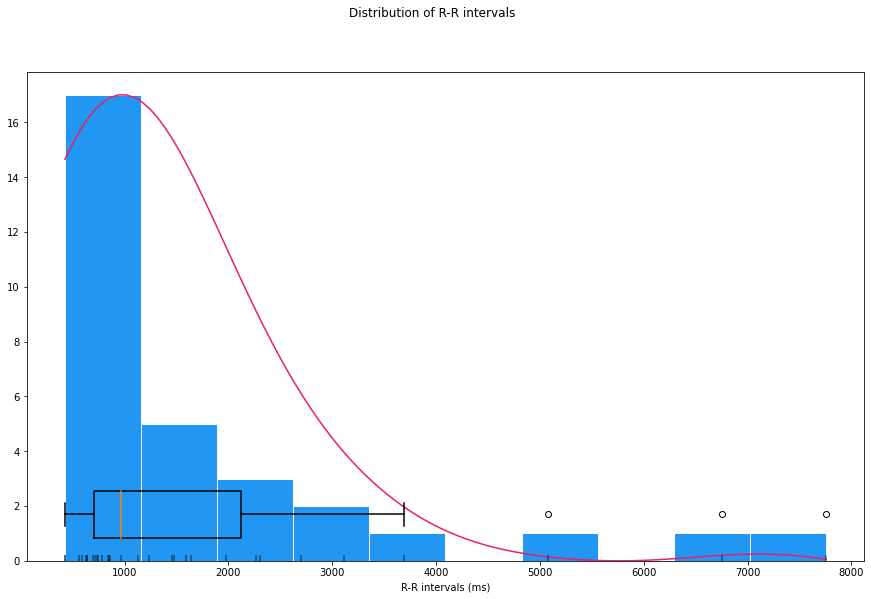

In [28]:
#detect the peaks and rr-intervalls on original signal
peaks, info = nk.ecg_peaks(data["heart"], sampling_rate=256)
hrv_time = nk.hrv_time(peaks, sampling_rate=256, show=True)

C:\Users\smend\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\smend\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\smend\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ValueError: `dataset` input should have multiple elements.

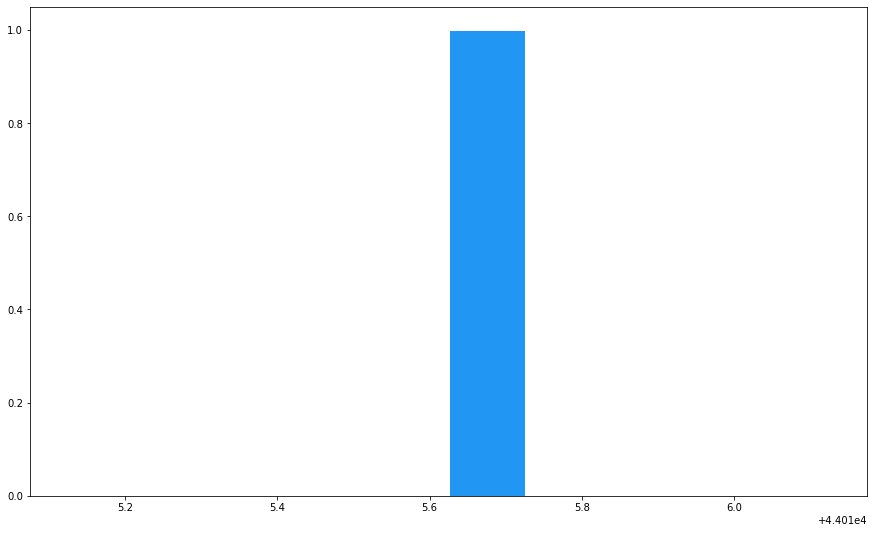

In [29]:
#detect the peaks and rr-intervalls on double-filtered signal
filteredsignalone = nk.signal_filter(data["heart"], lowcut=0.5, highcut=20, sampling_rate=256, method='butterworth', order=2)
filteredsignal = nk.signal_filter(filteredsignalone, lowcut=0.5, highcut=20, sampling_rate=256, method='butterworth', order=2)

peaks, info = nk.ecg_peaks(filteredsignal, method="martinez2003", sampling_rate=256)
hrv_time = nk.hrv_time(peaks, sampling_rate=256, show=True)

In [ ]:
#print hrv time domain data
hrv_time

In [ ]:
#print and calculate rr_interval 
rri = _hrv_get_rri(info["ECG_R_Peaks"], sampling_rate=256, interpolate=False)
info["ECG_R_Peaks"], rri

In [ ]:
#print and calculate rr_interval 
rri = _hrv_get_rri(info["ECG_R_Peaks"], sampling_rate=256, interpolate=False)
info["ECG_R_Peaks"], rri

In [ ]:
#print and calculate hrv frequencies
hrv_freq = nk.hrv_frequency(info["ECG_R_Peaks"], sampling_rate=256, show=True)
hrv_freq

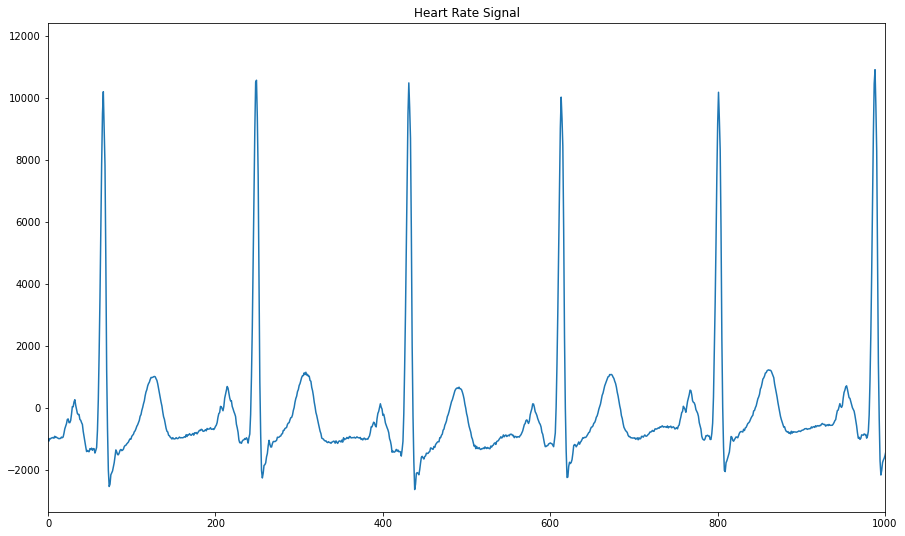

In [42]:
#plot original signal
plt.title("Heart Rate Signal") #The title of our plot
plt.plot(data.heart) #Draw the plot object
plt.xlim(0,1000)
plt.show() #Display the plot

In [31]:
#detect peaks in filteredsignal
rpeak = info['ECG_R_Peaks']
ybeat = [filteredsignal[x] for x in rpeak]


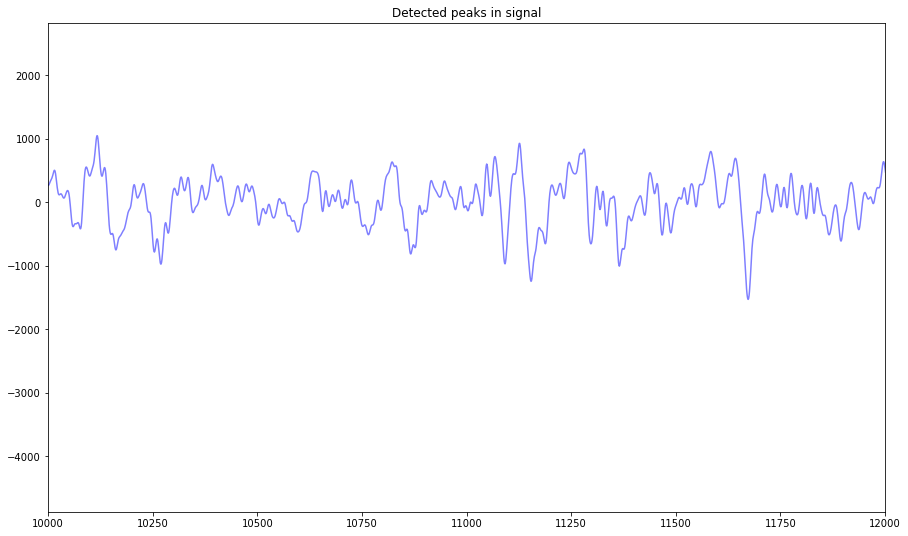

In [32]:
#plot filtered signal and peaks
plt.title("Detected peaks in signal")
plt.xlim(10000,12000)
plt.plot(filteredsignal, alpha=0.5, color='blue') #Plot semi-transparent HR
plt.scatter(rpeak,ybeat, color='red') #Plot detected peaks
plt.show()

In [1]:
filtered = nk.signal_filter(data["heart"], lowcut=0.5, highcut=20, sampling_rate=256, method='butterworth', order=2)
plt.title("Detected peaks in signal")
plt.xlim(0,2000)
plt.plot(filtered, alpha=0.5, color='blue') #Plot semi-transparent HR
plt.scatter(rpeak,ybeat, color='red') #Plot detected peaks
plt.show()

NameError: name 'nk' is not defined

In [ ]:
# Process ecg
ecg_signals, info = nk.ecg_process(data["heart"],method="neurokit", sampling_rate=256)
plot = nk.ecg_plot(ecg_signals[:1000], sampling_rate=256)

In [ ]:
print(len(data['heart']))

In [ ]:
# Half the data
epochs = nk.epochs_create(ecg_signals, events=[0, 143401], sampling_rate=200, epochs_start=0, epochs_end=143.401)